In [0]:
# Necessary imports
import torch 
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Create the sample dataset
X = np.array([1.0, 20.4, 30.5, 7.5, 9.9,
              100.9, 200.1, 45.1, 150.1, 7.0,
              29.4, 31.5, 157.3, 10.9, 120.6,
              16.9, 201.1, 21.1, 300.1, 21.0,
              120.4, 230.5, 37.5, 49.9, 230.0,
              109.9, 121.1, 145.1, 157.1, 17.0,
              219.4, 131.5, 187.3, 210.9, 290.6,
              126.9, 71.1, 91.1, 19.1, 100.0])
X_train = []
# normalize each value
for i in X:
  X_train.append([i/100])

X_train = np.array(X_train)

y_train = np.array([i*0.175 + 0.4 for i in X_train]) # bias should be 0.4 and w=0.175

In [3]:
# Check the shape of the data to be sure
print(X_train.shape)
print(y_train.shape)

(40, 1)
(40, 1)


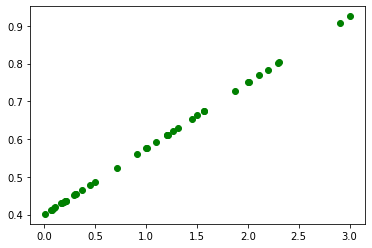

In [4]:
# Visualize the data
plt.scatter(X_train, y_train, c="green", label="Original Data")
plt.show()

In [0]:
# Create the torch tensors
X = torch.from_numpy(X_train)
y = torch.from_numpy(y_train)

In [6]:
print(X.shape)
print(y.shape)

torch.Size([40, 1])
torch.Size([40, 1])


In [0]:
# Define the parameters needed
input_size = 1
hidden_layers = 1
outputs = 1
learning_rate = 0.001
num_epochs = 150

In [8]:
# Create the first weight tensor
w1 = torch.rand(input_size, hidden_layers, requires_grad=True)
print(w1.shape)

torch.Size([1, 1])


In [9]:
b1 = torch.rand(hidden_layers, outputs, requires_grad=True)
print(b1.shape)

torch.Size([1, 1])


In [10]:
for i in range(1, num_epochs):
  # y = wx + b - one forward pass
  y_pred = X.mm(w1.double()).clamp(min=0).add(b1.double()) 
  # Here the `.clamp(min=0)` works as the ReLu actiation function

  # calculate the loss
  loss = (y-y_pred).pow(2).sum()

  if i % 25==0:
    print("Epoch : ", i, "\t Loss :", loss)
  
  # backpropogation
  loss.backward()

  with torch.no_grad():
    # update the weights and biases
    w1 -= (learning_rate * w1.grad)
    b1 -= (learning_rate * b1.grad)
    # set the gradients to 0
    w1.grad.zero_()
    b1.grad.zero_()

Epoch :  25 	 Loss : tensor(0.0021, dtype=torch.float64, grad_fn=<SumBackward0>)
Epoch :  50 	 Loss : tensor(0.0004, dtype=torch.float64, grad_fn=<SumBackward0>)
Epoch :  75 	 Loss : tensor(0.0001, dtype=torch.float64, grad_fn=<SumBackward0>)
Epoch :  100 	 Loss : tensor(4.1570e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
Epoch :  125 	 Loss : tensor(1.3125e-05, dtype=torch.float64, grad_fn=<SumBackward0>)


In [11]:
print(w1)
print(b1)

tensor([[0.1753]], requires_grad=True)
tensor([[0.3995]], requires_grad=True)


That's pretty close to the actual values we used. 

You can try running with more iterations if you want to see if you ever get the actual values! 

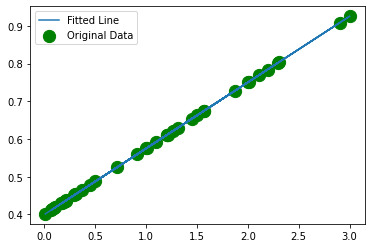

In [12]:
# Let's visualize the output
plt.scatter(X, y, c="green", s=150, label="Original Data")
plt.plot(X, y_pred.detach().numpy(), label="Fitted Line")
plt.legend()
plt.show()

As you can clearly see the line fits very well with the data.

This is a simple one neuron network that simply performs linear regression.

You might never use this in practice but the idea is to understand the concept!
